# Code Quality in Python

## Technical Debt in Code
* Recall that in a DevOps-oriented organization, we want to reduce or remove **technical debt**
* In practice, **technical debt** may mean poor quality or "ugly" code which is brittle (breaks easily) or hard to understand and maintain.
* By following standards and best practices, and using automation, we can improve code quality and avoid technical debt
* Just like camping - "leave everything better than you found it"

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


### PEP 8 - Python Code Style Guide
- https://www.python.org/dev/peps/pep-0008/
- Or, https://pep8.org

### But checking code style by hand is silly, so...
- pep8 (the tool):  https://pep8.readthedocs.io/en/release-1.7.x/
- PyLint:  https://www.pylint.org/
- Flake8:  https://flake8.pycqa.org/en/latest/
- Black:  https://black.readthedocs.io/en/stable/
- Most of these are available as tools directly integrated into editors and IDEs, too!
- Later, we'll incorporate these into our automated build / deploy pipelines

# Automated Testing in Python

## Agenda
* Why Automated Testing?
* Types of Automated Tests
* Unit Testing in Python
* Mocking and Faking
* Test-Driven Development (TDD)

## Practicing coding will make you a better coder
## You'll write more efficient, more maintainable code...

## But how do you know your code actually works as expected?

In [2]:
def fizzbuzz(num):
    """Returns 'fizz' for multiples of 3,
       'buzz' for multiples of 5,
       'fizzbuzz' for multiples of both,
       or returns the number passed."""
    result = ''
    if num % 3:
        result += 'fizz'
    if num % 5:
        result += 'buzz'
    result = result or num
    return result

In [9]:
# Fixed
def fizzbuzz(num):
    """Returns 'fizz' for multiples of 3,
       'buzz' for multiples of 5,
       'fizzbuzz' for multiples of both,
       or returns the number passed."""
    result = ''
    if num % 3 == 0:
        result += 'fizz'
    if num % 5 == 0:
        result += 'buzz'
    result = result or num
    return result

## Until you execute the code, you really don't know it works...
## So it's safe to assume it doesn't!

## Testing
* Verifies our code works as expected
* Reproduces bugs that have been reported
* Protects us against regressions

## Manual Testing
* Just run the code by hand

In [3]:
fizzbuzz(3)

'buzz'

In [4]:
fizzbuzz(5)

'fizz'

In [5]:
fizzbuzz(15)

15

## But we have to do that by hand, which takes time

## Automated Testing
* Testing code with code
* Fast
* Repeatable
* Deterministic (when built correctly)

In [8]:
def test_fizzbuzz_three():
    result = fizzbuzz(3)
    return result == 'fizz'

def test_fizzbuzz_five():
    result = fizzbuzz(5)
    return result == 'buzz'

def test_fizzbuzz_fifteen():
    result = fizzbuzz(15)
    return result == 'fizzbuzz'

def test_fizzbuzz_two():
    result = fizzbuzz(2)
    return result == 2

tests = [test_fizzbuzz_three, test_fizzbuzz_five, test_fizzbuzz_fifteen, test_fizzbuzz_two]
for test in tests:
    if test():
        print('Passed')
    else:
        print('Failed')

Passed
Passed
Passed
Passed


## Anatomy of a Test
* **Setup** - anything the test needs in advance (i.e. test data, account creation)
* **Execute** - actually run the code you're testing (the "Code under Test")
* **Validation** - make sure the results match your expectations
* **Teardown** - undo things in the setup phase to start with a "clean slate"

## Types of Automated Tests
* **Unit Tests** - test small, isolated pieces
* **Integration Tests** - test several pieces interoperating
* **Acceptance Tests** - end to end tests at a high level against original requirements
* **Smoke Tests** - quick tests after a deployment to ensure deployments succeeded
* **Stress Tests** - performance tests to determine the limits of capabilities and plan resources
* **Regression Tests** - unit tests specifically designed to reproduce a bug we've seen before, to ensure our fix stays fixed (i.e. doesn't regress)

# Unit Testing
* the smallest testable parts of an application, called _units_, are individually and independently scrutinized to ensure they work
* your functions/methods/procedures should do ONE thing (and do it well)–testing that thing should be relatively easy to explain
* exercise the __!#@%@!$#__ out of the unit to be sure it works, especially with corner cases, not just the expected cases
* sometimes called "white box testing"

## Pytest - Unit testing framework for Python
* Test Discovery - just prefix your test modules and functions with `test_`
* Test Validation - use Python keyword `assert` to test results
* Summarizes results, displays errors
* Lots of plugins (pytest-mocks, pytest-coverage, etc.)

In [10]:
assert False

AssertionError: 

In [13]:
# In module test_fizzbuzz.py and functions named test_xxxx
# from fizzbuzz import fizzbuzz
def test_fizzbuzz_three():
    result = fizzbuzz(3)
    assert result == 'fizz'

def test_fizzbuzz_five():
    result = fizzbuzz(5)
    assert result == 'buzz'

def test_fizzbuzz_fifteen():
    result = fizzbuzz(15)
    assert result == 'fizzbuzz'

def test_fizzbuzz_two():
    result = fizzbuzz(2)
    assert result == 2

In [16]:
%%bash
pytest

============================= test session starts ==============================
platform linux -- Python 3.7.9, pytest-6.2.3, py-1.10.0, pluggy-0.13.1
rootdir: /home/kwhitley/cohort-05/06_unit_testing
collected 12 items

test_fizz.py ....                                                        [ 33%]
examples/test_calc.py .....                                              [ 75%]
examples/test_pytest_example.py ...                                      [100%]

============================== 12 passed in 0.07s ==============================


In [17]:
%%bash
cd /home/kwhitley/Lab
pytest

============================= test session starts ==============================
platform linux -- Python 3.7.9, pytest-6.2.3, py-1.10.0, pluggy-0.13.1
rootdir: /home/kwhitley/Lab
collected 4 items

test_fizz.py ....                                                        [100%]

============================== 4 passed in 0.03s ===============================


In [20]:
%%bash
cd /home/kwhitley/Lab
pytest
# When tests fail

============================= test session starts ==============================
platform linux -- Python 3.7.9, pytest-6.2.3, py-1.10.0, pluggy-0.13.1
rootdir: /home/kwhitley/Lab
collected 0 items / 1 error

==================================== ERRORS ====================================
________________________ ERROR collecting test_fizz.py _________________________
../.local/lib/python3.7/site-packages/_pytest/python.py:578: in _importtestmodule
    mod = import_path(self.fspath, mode=importmode)
../.local/lib/python3.7/site-packages/_pytest/pathlib.py:524: in import_path
    importlib.import_module(module_name)
/usr/lib64/python3.7/importlib/__init__.py:127: in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
<frozen importlib._bootstrap>:1006: in _gcd_import
    ???
<frozen importlib._bootstrap>:983: in _find_and_load
    ???
<frozen importlib._bootstrap>:967: in _find_and_load_unlocked
    ???
<frozen importlib._bootstrap>:677: in _load_unlocked
    ?

CalledProcessError: Command 'b'cd /home/kwhitley/Lab\npytest\n# When tests fail\n'' returned non-zero exit status 2.

After breacking test:
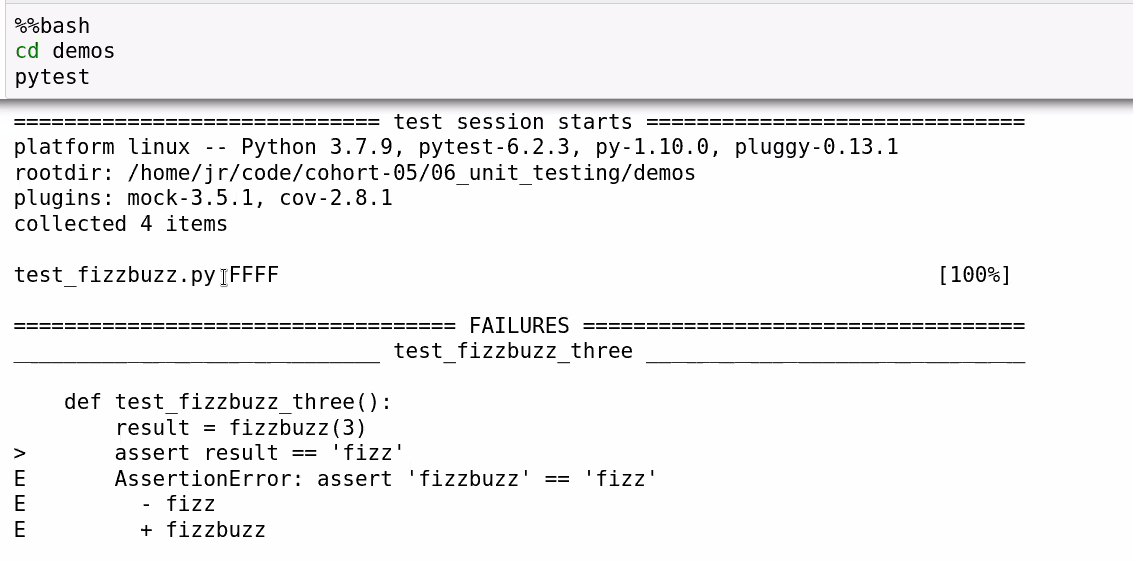

In [21]:
!pytest

============================= test session starts ==============================
platform linux -- Python 3.7.9, pytest-6.2.3, py-1.10.0, pluggy-0.13.1
rootdir: /home/kwhitley/cohort-05/06_unit_testing
collected 12 items                                                             

test_fizz.py ....                                                        [ 33%]
examples/test_calc.py .....                                              [ 75%]
examples/test_pytest_example.py ...                                      [100%]

============================== 12 passed in 0.05s ==============================


In [22]:
%%bash
cd /home/kwhitley/Lab
pytest -v

============================= test session starts ==============================
platform linux -- Python 3.7.9, pytest-6.2.3, py-1.10.0, pluggy-0.13.1 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/kwhitley/Lab
collecting ... collected 4 items

test_fizz.py::test_fizzbuzz_three PASSED                                 [ 25%]
test_fizz.py::test_fizzbuzz_five PASSED                                  [ 50%]
test_fizz.py::test_fizzbuzz_fifteen PASSED                               [ 75%]
test_fizz.py::test_fizzbuzz_two PASSED                                   [100%]

============================== 4 passed in 0.02s ===============================


## Lab:  Pytest Basics

* Copy the `fizzbuzz` function into a module `fizzbuzz.py` and the tests into `test_fizzbuzz.py` and run Pytest.  Don't forget to `import fizzbuzz` in your test module!  Modify the code until all the tests are passing when you run pytest.
* Add a few additional tests - try to think of some important cases we did not already test.

## What should be tested?
* Code under test should be isolated
* Test every code path possible
* Avoid testing third party tools or frameworks (already tested)
* Avoid dependencies (network, fileystem, environment)

## Test Coverage
* Measures how many lines of code were or were not executed during testing
* Usually expressed as a percentage, i.e. "77% code coverage"
* Ideally we'd have 100% code coverage, but...
* Diminishing returns with boilerplate code, autogenerated code, etc.

## Changing Code with Confidence
- In addition to verifying the correctness of our code, good code coverage means we can fearlessly make changes (new features, refactoring) because we have the "safety net" of automated tests to ensure we didn't break anything in the process
- If the whole team works on the same set of tests, we can collaborate much more simply without stepping on toes!

## Dealing with Dependencies
* often, our code interacts with environmental services, i.e., those which have undesirable side effects
 * inserting into database
 * posting on the web
 * system calls / interact with OS
* …as a developer, you care more that your code correctly called the system function for ejecting a CD rather than experiencing the CD tray open every time a test is run
* and we want our tests to be deterministic, and isolated from each other

## Mocking
* to deal with these kinds of services, we can use the __`mock`__ subpackage of the __`unitttest`__ library
* included as of Python 3.3…before that you need to download it via PyPI
* a mock object is one that is substituted for a real object in a test case
* unlike ordinary unit tests that assert on the state of an object, mock objects are used to test that interactions between multiple objects occurs as they should
* writing test cases with mocks make our tests smarter, faster, and able to reveal more about how the software actually works

In [23]:
from unittest.mock import Mock

mymock = Mock()
mymock.somemethod.return_value = 'Hello World!'

value = mymock.somemethod()
print('somemethod() returned', value)

somemethod() returned Hello World!


In [24]:
from unittest.mock import Mock

mymock = Mock()
# mymock.somemethod()

try:
    mymock.somemethod.assert_called()
    print('somemethod() was called')
except AssertionError:
    print('somemethod() was not called!')

somemethod() was not called!


In [25]:
import os

def backup_file():
    os.rename('datafile.csv', 'datafile.csv.bak')

In [26]:
backup_file()

FileNotFoundError: [Errno 2] No such file or directory: 'datafile.csv' -> 'datafile.csv.bak'

In [27]:
from unittest.mock import patch

with patch('os.rename') as rename:
    backup_file()
    rename.assert_called_with('datafile.csv', 'datafile.csv.bak')
    print('backup_file() correctly called rename!')

backup_file() correctly called rename!


In [28]:
# In module funny.py
import requests


def get_joke():
    headers = {
        'Accept': 'application/json',
    }
    response = requests.get('https://icanhazdadjoke.com/', headers=headers)
    if response.status_code != 200:
        joke_id = None
        joke = ''
    else:
        data = response.json()
        joke_id = data.get('id')
        joke = data.get('joke', '')
    return joke_id, joke

In [29]:
get_joke()

('JJ61L61Lusc', 'How many bones are in the human hand? A handful of them.')

In [32]:
# In module test_funny.py
from unittest.mock import patch


def test_get_joke_success():
    with patch('requests.get') as mock_get:
        mock_response = mock_get.return_value
        mock_response.status_code = 200
        mock_response.json.return_value = {
            'id': 12345,
            'joke': 'This is a test joke. Wakka wakka!',
            'status': 200
        }
        
        joke_id, joke = get_joke()
        assert joke_id == 12345
        assert joke == 'This is a test joke. Wakka wakka!'

In [33]:
test_get_joke_success()

In [34]:
def test_get_joke_server_error():
    with patch('requests.get') as mock_get:
        mock_response = mock_get.return_value
        mock_response.status_code = 500
        mock_response.json.return_value = {}
        
        joke_id, joke = get_joke()
        assert joke_id is None
        assert joke == ''

In [35]:
test_get_joke_server_error()

## Lab:  Mocking

Write a function that reads a string from an environment variable called **DATABASE_HOST** (see `os.getenv` or `os.environ`) and returns that string, prepended with the string **mysql://**.  Using the `unittest.mock` module, write unit tests for your function.  Try to cover all of the important cases you can think of - normal "happy" path, path when the variable doesn't exist, path when the variable does exist but is empty, etc.

# Test-Driven Development
* TDD is a way of developing software that looks like this...

![TDD](images/TDDflowchart.png)

# TDD is NOT REALLY ABOUT TESTING!
* traditionally, unit testing is about writing tests to verify the code works…
* …whereas main focus of TDD is not about testing
* writing a test before the code is implemented changes the way we think when we implement functionality
 * resulting code is more testable
 * usually simple, elegant design
 * easier to read and maintain
 * why?
* so really about writing better code, and we get an automated test suite as a nice side effect

## Lab: Test-Driven Development

Using a TDD approach, write tests and then minimal implementation to pass the tests for a function called `find_primes` that takes a single argument - the maximum number to check for primes.  Try to remember to utilize the Red -> Green -> Refactor method and take small steps at first - you will get faster as you practice this approach more often!